# Exercise 0 : Import Libraries

In [50]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Exercise 1 : Read the Dataset

In [31]:
df = pd.read_csv('heart_disease.csv')
df

Unnamed: 0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0             1   63    1   1       145   233    1        2      150      0   
1             2   67    1   4       160   286    0        2      108      1   
2             3   67    1   4       120   229    0        2      129      1   
3             4   37    1   3       130   250    0        0      187      0   
4             5   41    0   2       130   204    0        2      172      0   
..          ...  ...  ...  ..       ...   ...  ...      ...      ...    ...   
298         299   45    1   1       110   264    0        0      132      0   
299         300   68    1   4       144   193    1        0      141      0   
300         301   57    1   4       130   131    0        0      115      1   
301         302   57    0   2       130   236    0        2      174      0   
302         303   38    1   3       138   175    0        0      173      0   

     oldpeak  slope   ca thal  present  
0        2.3      3  0.0  6.0        0  
1        1.5      2  3.0  3.0        1  
2        2.6      2  2.0  7.0        1  
3        3.5      3  0.0  3.0        0  
4        1.4      1  0.0  3.0        0  
..       ...    ...  ...  ...      ...  
298      1.2      2  0.0  7.0        1  
299      3.4      2  2.0  7.0        1  
300      1.2      2  1.0  7.0        1  
301      0.0      2  1.0  3.0        1  
302      0.0      1    ?  3.0        0  

[303 rows x 15 columns]

# Exercise 2 : Drop Unnamed: 0 column

In [32]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca thal  present  
0        3  0.0  6.0        0  
1        2  3.0  3.0        1  
2        2  2.0  7.0        1  
3        3  0.0  3.0        0  
4        1  0.0  3.0        0  
..     ...  ...  ...      ...  
298      2  0.0  7.0        1  
299      2  2.0  7.0        1  
300      2  1.0  7.0        1  
301      2  1.0  3.0        1  
302      1    ?  3.0        0  

[303 rows x 14 columns]

# Exercise 3 : EDA

1. Basic info.
2. Number of rows and columns.
3. Statistical describtion.
4. Columns names.
5. Explore the columns ca and thal using any technique.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [5]:
df.shape

(303, 14)

In [7]:
df.describe().round()

age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
count  303.0  303.0  303.0     303.0  303.0  303.0    303.0    303.0  303.0   
mean    54.0    1.0    3.0     132.0  247.0    0.0      1.0    150.0    0.0   
std      9.0    0.0    1.0      18.0   52.0    0.0      1.0     23.0    0.0   
min     29.0    0.0    1.0      94.0  126.0    0.0      0.0     71.0    0.0   
25%     48.0    0.0    3.0     120.0  211.0    0.0      0.0    134.0    0.0   
50%     56.0    1.0    3.0     130.0  241.0    0.0      1.0    153.0    0.0   
75%     61.0    1.0    4.0     140.0  275.0    0.0      2.0    166.0    1.0   
max     77.0    1.0    4.0     200.0  564.0    1.0      2.0    202.0    1.0   

       oldpeak  slope  present  
count    303.0  303.0    303.0  
mean       1.0    2.0      0.0  
std        1.0    1.0      0.0  
min        0.0    1.0      0.0  
25%        0.0    1.0      0.0  
50%        1.0    2.0      0.0  
75%        2.0    2.0      1.0  
max        6.0    3.0      1.0

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

In [10]:
df['ca'].value_counts()


ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [11]:
df['thal'].value_counts()


thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

# Exercise 4 : Handle missing data

In [33]:
df[df['ca']=='?']

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
166   52    1   3       138   223    0        0      169      0      0.0   
192   43    1   4       132   247    1        2      143      1      0.1   
287   58    1   2       125   220    0        0      144      0      0.4   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope ca thal  present  
166      1  ?  3.0        0  
192      2  ?  7.0        1  
287      2  ?  7.0        0  
302      1  ?  3.0        0

In [34]:
df['ca'].loc[(df['ca']=='?')]=np.NaN

In [35]:
df[df['thal']=='?']

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
87    53    0   3       128   216    0        2      115      0      0.0   
266   52    1   4       128   204    1        0      156      1      1.0   

     slope   ca thal  present  
87       1  0.0    ?        0  
266      2  0.0    ?        1

In [36]:
df['thal'].loc[(df['thal']=='?')]=np.NaN

In [37]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
present     0
dtype: int64

In [38]:
df=df.dropna()
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
present     0
dtype: int64

# Exercise 5 : Handle Features

- Use one method between these two methods for the object type columns :-
    1. Convert data type to numeric.
    2. One hot encoding.

In [39]:
df['ca'] = df['ca'].astype('float')
df['thal'] = df['thal'].astype('float')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  present   297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


# Exercise 6 : Remove Outliers (If exists)

- Use box plots for some continuous data.

# Not included in the plots

### age , sex , exang, fbs , slope , present , restecg , cp , ca 

In [41]:
out = df.drop(columns=['age' , 'sex' , 'exang', 'fbs' , 'slope' , 'present' , 'restecg' , 'cp','ca'])
out

trestbps  chol  thalach  oldpeak  thal
0         145   233      150      2.3   6.0
1         160   286      108      1.5   3.0
2         120   229      129      2.6   7.0
3         130   250      187      3.5   3.0
4         130   204      172      1.4   3.0
..        ...   ...      ...      ...   ...
297       140   241      123      0.2   7.0
298       110   264      132      1.2   7.0
299       144   193      141      3.4   7.0
300       130   131      115      1.2   7.0
301       130   236      174      0.0   3.0

[297 rows x 5 columns]

In [22]:
data = [
    out['trestbps'], out['chol'], out['thalach'],
    out['oldpeak'], out['thal']
]

labels = [
    'trestbps', 'chol', 'thalach', 'oldpeak', 'thal'
]

fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=data, ax=ax)
ax.set_xticklabels(labels)
ax.set_title('Box Plots')

plt.show()

In [23]:
def outt(Q1,Q3):
    IQR=Q3-Q1
    lower = Q1-(1.5*IQR)
    Higher = Q3+(1.5*IQR)
    print(f'The Higher outt is:{Higher}\n The lower is:{lower}')

print('trestbps outlier: ')
outt(120,140)
print('chol outlier: ')
outt(211,276)

trestbps outlier: 
The Higher outt is:170.0
 The lower is:90.0
chol outlier: 
The Higher outt is:373.5
 The lower is:113.5


In [43]:
df = df[(df['trestbps']>90)&(df['trestbps']<170)]
fig=px.box(df,x='trestbps')
fig.show()

In [45]:
df = df[(df['chol']>113.5)&(df['chol']<373.5)]
fig=px.box(df,x='chol')
fig.show()

# Exercise 7 : Feature Selection using Correlation Matrix

1. Calculate the Correlation Matrix.
2. Identify Highly Correlated Features.
    - The threshold is 0.6
3. Remove Highly Correlated Features.

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   57    0   4       140   241    0        0      123      1      0.2   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   

     slope   ca  thal  present  
0        3  0.0   6.0        0  
1        2  3.0   3.0        1  
2        2  2.0   7.0        1  
3        3  0.0   3.0        0  
4        1  0.0   3.0        0  
..     ...  ...   ...      ...  
297      2  0.0   7.0        1  
298      2  0.0   7.0        1  
299      2  2.0   7.0        1  
300      2  1.0   7.0        1  
301      2  1.0   3.0        1  

[279 rows x 14 columns]

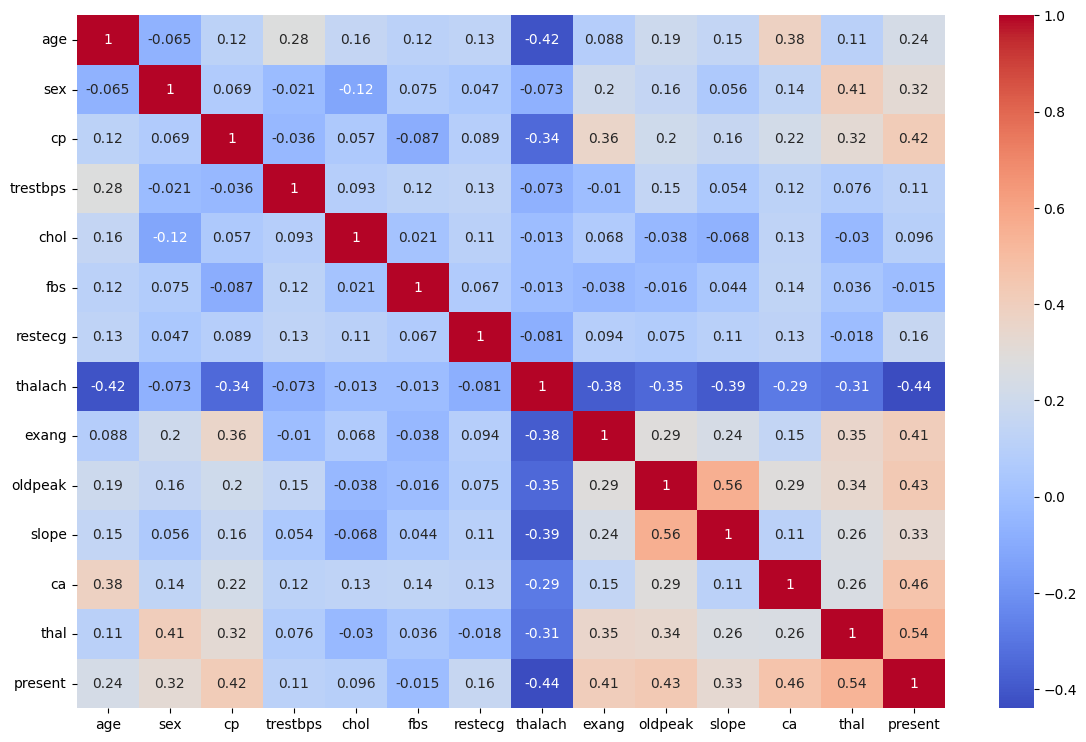

In [46]:
corr = df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
df

# Exercise 8 : X and Y split, then train and test split

In [47]:
X= df.drop(columns=['present'])
y = df.loc[:,["present"]]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [49]:
print('Pos',(y_train == 1).sum())
print('Neg',(y_train == 0).sum())

Pos present    99
dtype: int64
Neg present    124
dtype: int64


# Exercise 9 : Train the model

In [51]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel

LogisticRegression()

In [52]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [54]:
pred = logmodel.predict(X_test)

# Exercise 10 : Evaluate the model

1. Find the score of the training data.
2. Find the scores of the testing data :-
    - Find the accuracy.
    - Find the Sensitivity.
    - Find the Specificity.
    - Find the Sensitivity/Specificity.
    - Find the AUC-ROC.

In [80]:
from sklearn.metrics import \
     classification_report, confusion_matrix,\
     accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, explained_variance_score

In [60]:
print(f'The classification report :-\n{confusion_matrix(y_test, pred)}')


The classification report :-
[[27  2]
 [ 8 19]]


In [66]:
print('Train: ',logmodel.score(X_train, y_train))
print('Test: ',logmodel.score(X_test, y_test))

print('accuracy: ', accuracy_score(y_test,pred))
print('the Sensitivity: ', recall_score(y_test,pred))
print('the Specificity: ', 19/(19+2))
print('the Sensitivity/Specificity: ', recall_score(y_test,pred)/(19/(19+2)))
print('The AUC-ROC: ', roc_auc_score(y_test,pred))

Train:  0.8654708520179372
Test:  0.8214285714285714
accuracy:  0.8214285714285714
the Sensitivity:  0.7037037037037037
the Specificity:  0.9047619047619048
the Sensitivity/Specificity:  0.7777777777777778
Find the AUC-ROC:  0.8173690932311622


# Exercise 11 : Find the wights and y intercept

In [56]:
print('Weght: ',logmodel.coef_)
print('intercept: ',logmodel.intercept_)

Weght:  [[-0.04415903  0.96754583  0.59425092  0.01056226  0.00575937 -0.47636173
   0.32227488 -0.04124009  0.28616167  0.37904131  0.00538044  0.90683851
   0.38097748]]
intercept:  [-0.14250474]


# Exercise 12 : Plot the model complexity

- Is the model overfit? Underfit? Good? Explain

# Exercise 13 : Use Regularizations

1. Build three models with Lasso Regularization and three different lambda values.
2. Build three models with Ridge Regularization and three different lambda values.
3. Build three models with Elastic-net Regularization and three different lambda values.

In general, you need to build 9 models with different Regularizations and different lambda values.

Do not forget to evaluate them (find accuracy, recall, precision, f1 score, AUC-ROC).

In [186]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [252]:
X= df.drop(columns=['present'])
y = df.loc[:,["present"]]

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [254]:
alpha=[0.1,1.0,10.0]

# Lasso Regularization

In [255]:
model1 = LogisticRegression(penalty='l1',C=1/alpha[0],solver='liblinear')
model2 = LogisticRegression(penalty='l1',C=1/alpha[1],solver='liblinear')
model3 = LogisticRegression(penalty='l1',C=1/alpha[2],solver='liblinear')

___
# Model 1

In [256]:
model1.fit(X_train, y_train)

LogisticRegression(C=10.0, penalty='l1', solver='liblinear')

In [257]:
y_pred=model1.predict(X_test)

In [258]:
print('accuracy: ', accuracy_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('F1 score: ', f1_score(y_test,y_pred))
print('AUC-ROC: ', roc_auc_score(y_test,y_pred))

accuracy:  0.8214285714285714
Recall:  0.7037037037037037
Precision:  0.9047619047619048
F1 score:  0.7916666666666667
AUC-ROC:  0.8173690932311622


___
# Model 2

In [259]:
model2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [260]:
y_pred=model2.predict(X_test)

In [261]:
print('accuracy: ', accuracy_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('F1 score: ', f1_score(y_test,y_pred))
print('AUC-ROC: ', roc_auc_score(y_test,y_pred))

accuracy:  0.8214285714285714
Recall:  0.7037037037037037
Precision:  0.9047619047619048
F1 score:  0.7916666666666667
AUC-ROC:  0.8173690932311622


___
# Model 3

In [262]:
model3.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [263]:
y_pred=model3.predict(X_test)

In [264]:
print('accuracy: ', accuracy_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('F1 score: ', f1_score(y_test,y_pred))
print('AUC-ROC: ', roc_auc_score(y_test,y_pred))

accuracy:  0.7857142857142857
Recall:  0.6296296296296297
Precision:  0.8947368421052632
F1 score:  0.7391304347826088
AUC-ROC:  0.7803320561941253


#### End lasso 
***

# Ridge Regularization

In [265]:
model1 = LogisticRegression(penalty='l2',C=1/alpha[0],solver='liblinear')
model2 = LogisticRegression(penalty='l2',C=1/alpha[1],solver='liblinear')
model3 = LogisticRegression(penalty='l2',C=1/alpha[2],solver='liblinear')

___
# Model 1

In [266]:
model1.fit(X_train, y_train)

LogisticRegression(C=10.0, solver='liblinear')

In [267]:
y_pred=model1.predict(X_test)

In [268]:
print('accuracy: ', accuracy_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('F1 score: ', f1_score(y_test,y_pred))
print('AUC-ROC: ', roc_auc_score(y_test,y_pred))

accuracy:  0.8214285714285714
Recall:  0.7037037037037037
Precision:  0.9047619047619048
F1 score:  0.7916666666666667
AUC-ROC:  0.8173690932311622


___
# Model 2

In [269]:
model2.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [270]:
y_pred=model2.predict(X_test)

In [271]:
print('accuracy: ', accuracy_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('F1 score: ', f1_score(y_test,y_pred))
print('AUC-ROC: ', roc_auc_score(y_test,y_pred))

accuracy:  0.8214285714285714
Recall:  0.7037037037037037
Precision:  0.9047619047619048
F1 score:  0.7916666666666667
AUC-ROC:  0.8173690932311622


___
# Model 3

In [272]:
model3.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [273]:
y_pred=model3.predict(X_test)

In [274]:
print('accuracy: ', accuracy_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('F1 score: ', f1_score(y_test,y_pred))
print('AUC-ROC: ', roc_auc_score(y_test,y_pred))

accuracy:  0.8214285714285714
Recall:  0.7037037037037037
Precision:  0.9047619047619048
F1 score:  0.7916666666666667
AUC-ROC:  0.8173690932311622


#### End Ridge 
***

# Elastic-net Regularization

In [275]:
model1 = LogisticRegression(penalty='elasticnet', C=1/alpha[0], solver='saga', l1_ratio=0.5)
model2 = LogisticRegression(penalty='elasticnet', C=1/alpha[1], solver='saga', l1_ratio=0.5)
model3 = LogisticRegression(penalty='elasticnet', C=1/alpha[2], solver='saga', l1_ratio=0.5)

___
# Model 1

In [276]:
model1.fit(X_train, y_train)

LogisticRegression(C=10.0, l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [277]:
y_pred=model1.predict(X_test)

In [278]:
print('accuracy: ', accuracy_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('F1 score: ', f1_score(y_test,y_pred))
print('AUC-ROC: ', roc_auc_score(y_test,y_pred))

accuracy:  0.6785714285714286
Recall:  0.37037037037037035
Precision:  0.9090909090909091
F1 score:  0.5263157894736842
AUC-ROC:  0.6679438058748404


___
# Model 2

In [279]:
model2.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [280]:
y_pred=model2.predict(X_test)

In [281]:
print('accuracy: ', accuracy_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('F1 score: ', f1_score(y_test,y_pred))
print('AUC-ROC: ', roc_auc_score(y_test,y_pred))

accuracy:  0.6785714285714286
Recall:  0.37037037037037035
Precision:  0.9090909090909091
F1 score:  0.5263157894736842
AUC-ROC:  0.6679438058748404


___
# Model 3

In [282]:
model3.fit(X_train, y_train)

LogisticRegression(C=0.1, l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [283]:
y_pred=model3.predict(X_test)

In [284]:
print('accuracy: ', accuracy_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('F1 score: ', f1_score(y_test,y_pred))
print('AUC-ROC: ', roc_auc_score(y_test,y_pred))

accuracy:  0.6785714285714286
Recall:  0.37037037037037035
Precision:  0.9090909090909091
F1 score:  0.5263157894736842
AUC-ROC:  0.6679438058748404


#### End Elastic-net 
***